# Logistic Regression 

Logistic regression is a statistical method used for binary classification problems, where the goal is to predict one of two possible outcomes. Despite its name, logistic regression is actually a classification algorithm rather than a regression algorithm.

In logistic regression, the logistic function (also known as the sigmoid function) maps any real-valued number to a value between 0 and 1. The logistic function is defined as:

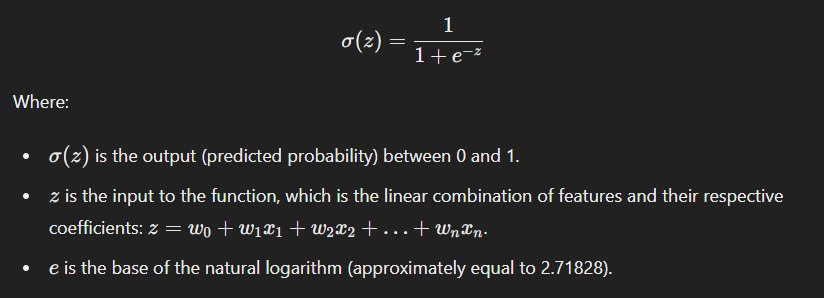

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

class LogisticRegression:
    def __init__(self, learning_rate=1.0e-2, epochs=1000, random_state=None):
        """
        Initialize Logistic Regression model.

        Parameters:
        learning_rate (float): The learning rate for gradient descent.
        epochs (int): The number of iterations for gradient descent.
        random_state (int): Seed for random number generator for reproducibility.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        if random_state:
            np.random.seed(random_state)
        self.coef_ = None  # Coefficients (weights) of the model
        self.intercept_ = None  # Intercept of the model
        
    def fit(self, X, y):
        """
        Fit the Logistic Regression model to the training data.

        Parameters:
        X (numpy.ndarray): The feature matrix of shape (n_samples, n_features).
        y (numpy.ndarray): The target values of shape (n_samples,).

        Returns:
        self: Returns an instance of self.
        """
        self.m, self.n = X.shape  # Number of samples and features
        self.X = X  # Store training data
        self.y = y  # Store target values
        
        self.W = np.random.randn(self.n)  # Initialize weights randomly
        self.b = 0  # Initialize bias term
        
        for _ in range(self.epochs):  # Iterate through epochs
            self.update_weights()  # Update weights using gradient descent
            
        self.coef_ = self.W  # Save learned coefficients
        self.intercept_ = self.b  # Save learned intercept
        
        # Calculate confusion matrix and classification report
        y_pred = self.predict(self.X)
        cm = confusion_matrix(self.y, y_pred)
        cr = classification_report(self.y, y_pred)
        print("Confusion Matrix:")
        print(cm)
        print("\nClassification Report:")
        print(cr)

        
    def sigmoid(self, z):
        """
        Compute the sigmoid function.

        Parameters:
        z (numpy.ndarray): Linear combination of weights and features.

        Returns:
        numpy.ndarray: Sigmoid of the input.
        """
        return 1 / (1 + np.exp(-z))
    
    def update_weights(self):
        """
        Update weights using gradient descent.
        """
        linear_model = self.X.dot(self.W) + self.b  # Linear combination
        y_pred = self.sigmoid(linear_model)  # Predicted values
        
        # Calculate gradients
        dW = (self.X.T.dot(y_pred - self.y)) / self.m
        db = np.sum(y_pred - self.y) / self.m
        
        # Update weights and bias term
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db
    
    def predict_proba(self, X):
        """
        Predict probability estimates.

        Parameters:
        X (numpy.ndarray): The feature matrix of shape (n_samples, n_features).

        Returns:
        numpy.ndarray: Probability estimates of shape (n_samples,).
        """
        linear_model = X.dot(self.W) + self.b
        return self.sigmoid(linear_model)
    
    def predict(self, X):
        """
        Predict binary class labels.

        Parameters:
        X (numpy.ndarray): The feature matrix of shape (n_samples, n_features).

        Returns:
        numpy.ndarray: Predicted class labels of shape (n_samples,).
        """
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)
    
    # Method to calculate Cross-Entropy Loss between true values and predicted values.
    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15  # Small value to avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip values to avoid log(0)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


In [30]:
if __name__ == '__main__':
    
# Set random seed for reproducibility
    np.random.seed(42)

    # Number of samples
    n_samples = 1000

    # Generate features (two features)
    X = np.random.randn(n_samples, 2)
    # Generate target values (binary classification)
    y = (X[:, 0] + X[:, 1] + 0.5 > 0).astype(int)

    model = LogisticRegression()  # Create an object of the LinearRegression class

    # Training the model
    model.fit(X, y)  # Train the model using the input features (X) and target values (y)

    # Making predictions
    predictions = model.predict(X)  # Use the trained model to make predictions on the input features (X)

Confusion Matrix:
[[303  32]
 [  0 665]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       335
           1       0.95      1.00      0.98       665

    accuracy                           0.97      1000
   macro avg       0.98      0.95      0.96      1000
weighted avg       0.97      0.97      0.97      1000



### Scikit-Learn Library

In [35]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Generate some random data
np.random.seed(42)
n_samples = 1000

# Generate features (two features)
X = np.random.randn(n_samples, 2)
# Generate target values (binary classification)
y = (X[:, 0] + X[:, 1] + 0.5 > 0).astype(int)

# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Train the model on the entire dataset
logistic_model.fit(X, y)

# Predict classes on the entire dataset
y_pred = logistic_model.predict(X)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))


Confusion Matrix:
[[329   6]
 [  0 665]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       335
           1       0.99      1.00      1.00       665

    accuracy                           0.99      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

